### Árbol de Decisión modelo de Clasificación en Scikit-Learn - Titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic = pd.read_csv("C:/Users/Layla/Desktop/Docencia/Coder House/Materiales complementarios/Mod 5 - Data Science/6. Selección del Algoritmo y Entrenamiento del Modelo I/Datos/Titanic.csv", sep = ",")

In [2]:
#Separación en Train y Test
X = titanic.drop("Survived", axis=1)
y = titanic.Survived

In [3]:
from sklearn.model_selection import train_test_split 

#Train y Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [4]:
#Arbol de Decision
from sklearn.tree import DecisionTreeClassifier 
arbol_de_decision = DecisionTreeClassifier(max_depth=2, random_state = 42) 

In [5]:
#Fit
arbol_de_decision.fit(X_train,y_train) #Entrenamos el modelo

DecisionTreeClassifier(max_depth=2, random_state=42)

In [6]:
#Prediccion
y_test_pred = arbol_de_decision.predict(X_test)

A lo largo de este notebook, se solicita calcular las métricas requeridas como así también su correspondiente interpretación: 

1. Calcular la métrica Accuracy.

In [7]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.786046511627907


2. Crear la Matriz de Confusión

[[121   5]
 [ 41  48]]


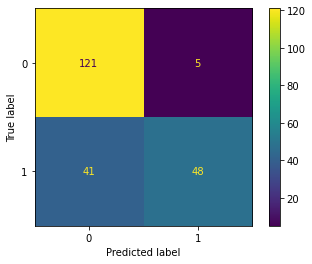

In [8]:
#Matriz de Confusión
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Matriz de Confusión
print(confusion_matrix(y_test, y_test_pred))

#Ploteamos la Matriz
plot_confusion_matrix(arbol_de_decision, X_test, y_test)
plt.show()

3. Calcular la métrica Precision

In [9]:
from sklearn.metrics import precision_score

# Precision!
print(f"Precision Score of the classifier is: {precision_score(y_test, y_test_pred)}")

Precision Score of the classifier is: 0.9056603773584906


4. Calcular la métrica Recall

In [10]:
from sklearn.metrics import recall_score

# Recall
print(f"Recall Score of the classifier is: {recall_score(y_test, y_test_pred)}")

Recall Score of the classifier is: 0.5393258426966292


5. Calcular la métrica F1 score

In [11]:
from sklearn.metrics import f1_score

# Calculo del F1 score
print(f"F1 Score of the classifier is: {f1_score(y_test, y_test_pred)}")

F1 Score of the classifier is: 0.676056338028169


6. Calcular y plotear la Curva ROC

AUC for our classifier is: 0.792402354200107


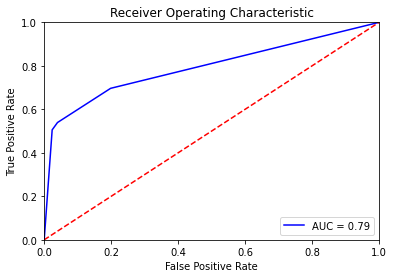

In [12]:
#Curva ROC
from sklearn.metrics import roc_curve, auc

class_probabilities = arbol_de_decision.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()